# Quality control

In [58]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import anndata as ad
import hdf5plugin
import pyreadr
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import os 
#external modules
import scanpy.external as sce
#pretty plotting
import seaborn as sb
import sys 
import config as general_paths
import warnings
warnings.filterwarnings("ignore")
sb.set_context(context='poster')

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

scanpy==1.9.8 anndata==0.9.2 umap==0.5.5 numpy==1.24.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.1.3 statsmodels==0.14.1 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [59]:
figure_path = general_paths.figures_path
data_path = general_paths.data_path
output_path = general_paths.output_path
local_path = general_paths.local_path

In [60]:
# Filtering parameters

HOW_MANY_HIGHLY_VARIABLE_GENES = 16000 # it used to be 15000 (but that cuts out Piezo1 after filtering out not highly variable genes)
MIN_CELL_COUNTS = 10000
MIN_GENES = 3000
MIN_CELLS_WITH_GENE = 5
MITOCHONDRIAL_THRESHOLD_PCT = 5

In [61]:
# load the unfiltered matrix and define all paths for storing data

results_file_sample1 = os.path.join(local_path,'sample1/counts_unfiltered_umi/adata.h5ad')  # the file that will store the analysis results
results_file_sample2 = os.path.join(local_path,'sample2/counts_unfiltered_umi/adata.h5ad') # the file that will store the analysis results
results_file_sample3 = os.path.join(local_path,'sample3/counts_unfiltered_umi/adata.h5ad')  # the file that will store the analysis results
results_file_sample4 = os.path.join(local_path,'sample4/counts_unfiltered_umi/adata.h5ad')  # the file that will store the analysis results
results_file_sample5 = os.path.join(local_path,'sample5/counts_unfiltered_umi/adata.h5ad') # the file that will store the analysis results
results_file_sample6 = os.path.join(local_path,'sample6/counts_unfiltered_umi/adata.h5ad') 
results_file_sample7 = os.path.join(local_path,'sample7/counts_unfiltered_umi/adata.h5ad')
#txt file with kept cells
cell_barcode_file_sample1 = os.path.join(local_path,'sample1/counts_umiR/SS3_22_291kept_barcodes.txt')
cell_barcode_file_sample2 = os.path.join(local_path,'sample2/counts_umiR/SS3_23_049kept_barcodes.txt')
cell_barcode_file_sample3 = os.path.join(local_path,'sample3/counts_umiR/SS3_23_127kept_barcodes.txt')
cell_barcode_file_sample4 = os.path.join(local_path,'sample4/counts_umiR/SS3_23_193kept_barcodes.txt')
cell_barcode_file_sample5 = os.path.join(local_path,'sample5/counts_umiR/SS3_23_195kept_barcodes.txt')
cell_barcode_file_sample6 = os.path.join(local_path,'sample6/counts_umiR/SS3_23_325kept_barcodes.txt')
cell_barcode_file_sample7= os.path.join(local_path,'sample7/counts_umiR/SS3_23_327kept_barcodes.txt')
#read barcodes with kalisto
cell_barcode_file_new_sample1 = os.path.join(local_path,'sample1/counts_unfiltered_umi/cells_x_genes.barcodes.txt')
cell_barcode_file_new_sample2 = os.path.join(local_path,'sample2/counts_unfiltered_umi/cells_x_genes.barcodes.txt')
cell_barcode_file_new_sample3 = os.path.join(local_path,'sample3/counts_unfiltered_umi/cells_x_genes.barcodes.txt')
cell_barcode_file_new_sample4 = os.path.join(local_path,'sample4/counts_unfiltered_umi/cells_x_genes.barcodes.txt')
cell_barcode_file_new_sample5 = os.path.join(local_path,'sample5/counts_unfiltered_umi/cells_x_genes.barcodes.txt')
cell_barcode_file_new_sample6 = os.path.join(local_path,'sample6/counts_unfiltered_umi/cells_x_genes.barcodes.txt')
cell_barcode_file_new_sample7 = os.path.join(local_path,'sample7/counts_unfiltered_umi/cells_x_genes.barcodes.txt')
#txt file with well barcodes. the text contains the cell barcode corresponding to each position in the plate
well_barcode_sample1 = os.path.join(local_path,'sample1/counts_umiR/SS3_22_291.well_barcodes.txt')
well_barcode_sample2 = os.path.join(local_path,'sample2/counts_umiR/SS3_23_049.well_barcodes.txt')
well_barcode_sample3 = os.path.join(local_path,'sample3/counts_umiR/SS3_23_127.well_barcodes.txt')
well_barcode_sample4 = os.path.join(local_path,'sample4/counts_umiR/SS3_23_193.well_barcodes.txt')
well_barcode_sample5 = os.path.join(local_path,'sample5/counts_umiR/SS3_23_195.well_barcodes.txt')
well_barcode_sample6 = os.path.join(local_path,'sample6/counts_umiR/SS3_23_325.well_barcodes.txt')
well_barcode_sample7 = os.path.join(local_path,'sample7/counts_umiR/SS3_23_327.well_barcodes.txt')
###upload excel with red and green flourecence from campari (has information about position in plate and fluorecence level)
florecence_1_file_path =os.path.join(local_path,'sample1/counts_umiR/well_1_data_base.csv')
florecence_2_file_path = os.path.join(local_path,'sample2/counts_umiR/well_2_data_base.csv')
florecence_3_file_path = os.path.join(local_path,'sample3/counts_umiR/well_3_data_base.csv')
florecence_4_file_path = os.path.join(local_path,'sample4/counts_umiR/well_4_data_base.csv')
florecence_5_file_path = os.path.join(local_path,'sample5/counts_umiR/well_5_data_base.csv')
florecence_6_file_path = os.path.join(local_path,'sample6/counts_umiR/well_6_data_base.csv')
florecence_7_file_path = os.path.join(local_path,'sample7/counts_umiR/well_7_data_base.csv')

In [62]:
### load raw adata file using adata libraty
sample1 = ad.read_h5ad(results_file_sample1)
sample2 = ad.read_h5ad(results_file_sample2)
sample3 = ad.read_h5ad(results_file_sample3)
sample4 = ad.read_h5ad(results_file_sample4)
sample5 = ad.read_h5ad(results_file_sample5)
sample6 = ad.read_h5ad(results_file_sample6)
sample7 = ad.read_h5ad(results_file_sample7)
### read fluorecence levels
flourecence1 = pd.read_csv(florecence_1_file_path)
flourecence2 = pd.read_csv(florecence_2_file_path)
flourecence3 = pd.read_csv(florecence_3_file_path)
flourecence4 = pd.read_csv(florecence_4_file_path)
flourecence5 = pd.read_csv(florecence_5_file_path)
flourecence6 = pd.read_csv(florecence_6_file_path)
flourecence7 = pd.read_csv(florecence_7_file_path)
### read kept barcodes and barcodes provided by kalisto
df_1_sample1 = pd.read_csv(cell_barcode_file_sample1, delimiter = "\,")
df_2_sample1 = pd.read_csv(cell_barcode_file_new_sample1)

df_1_sample2 = pd.read_csv(cell_barcode_file_sample2, delimiter = "\,")
df_2_sample2 = pd.read_csv(cell_barcode_file_new_sample2)

df_1_sample3 = pd.read_csv(cell_barcode_file_sample3, delimiter = "\,")
df_2_sample3 = pd.read_csv(cell_barcode_file_new_sample3)

df_1_sample4 = pd.read_csv(cell_barcode_file_sample4, delimiter = "\,")
df_2_sample4 = pd.read_csv(cell_barcode_file_new_sample4)

df_1_sample5 = pd.read_csv(cell_barcode_file_sample5, delimiter = "\,")
df_2_sample5 = pd.read_csv(cell_barcode_file_new_sample5)

df_1_sample6 = pd.read_csv(cell_barcode_file_sample6, delimiter = "\,")
df_2_sample6 = pd.read_csv(cell_barcode_file_new_sample6)

df_1_sample7 = pd.read_csv(cell_barcode_file_sample7, delimiter = "\,")
df_2_sample7 = pd.read_csv(cell_barcode_file_new_sample7)

In [63]:
### merge data base. Merge information about cell barcode and fluorecence 
### (using as common demonimator the position in the plate)
barcode_list_sample1 = list(df_1_sample1['XC'])
well_df_sample1 = pd.read_csv(well_barcode_sample1, sep = "\t")
mergedRes1 = pd.merge(well_df_sample1 , flourecence1, on ='well_id')

barcode_list_sample2 = list(df_1_sample2['XC'])
well_df_sample2 = pd.read_csv(well_barcode_sample2, sep = "\t")
mergedRes2 = pd.merge(well_df_sample2 , flourecence2, on ='well_id')

barcode_list_sample3 = list(df_1_sample3['XC'])
well_df_sample3 = pd.read_csv(well_barcode_sample3, sep = "\t")
mergedRes3 = pd.merge(well_df_sample3 , flourecence3, on ='well_id')

barcode_list_sample4 = list(df_1_sample4['XC'])
well_df_sample4 = pd.read_csv(well_barcode_sample4, sep = "\t")
mergedRes4 = pd.merge(well_df_sample4 , flourecence4, on ='well_id')

barcode_list_sample5 = list(df_1_sample5['XC'])
well_df_sample5 = pd.read_csv(well_barcode_sample5, sep = "\t")
mergedRes5 = pd.merge(well_df_sample5 , flourecence5, on ='well_id')

barcode_list_sample6 = list(df_1_sample6['XC'])
well_df_sample6 = pd.read_csv(well_barcode_sample6, sep = "\t")
mergedRes6 = pd.merge(well_df_sample6 , flourecence6, on ='well_id')

barcode_list_sample7 = list(df_1_sample7['XC'])
well_df_sample7 = pd.read_csv(well_barcode_sample7, sep = "\t")
mergedRes7 = pd.merge(well_df_sample7 , flourecence7, on ='well_id')

In [64]:
# make names unique
sample1.var_names_make_unique()
sample2.var_names_make_unique()
sample3.var_names_make_unique()
sample4.var_names_make_unique()
sample5.var_names_make_unique()
sample6.var_names_make_unique()
sample7.var_names_make_unique()

In [65]:
#Create a plot showing genes detected as a function of UMI counts.
def plot_counts(adata,plot_title):
    fig, ax = plt.subplots(1,3)
    x = np.asarray(adata.X.sum(axis=1))[:,0]
    y = np.asarray(np.sum(adata.X>0, axis=1))[:,0]
    ax[0].scatter(x, y, color="b", alpha=0.25)
    ax[0].set_ylabel("Genes Detected")
    ax[0].set_xlabel("UMI Counts")
    #ax.set_xscale('log')
    #ax.set_yscale('log')

    #histogram definition
    bins = [1500, 1500] # number of bins
    # histogram the data
    hh, locx, locy = np.histogram2d(x, y, bins=bins)
    # Sort the points by density, so that the densest points are plotted last
    z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
    idx = z.argsort()
    x2, y2, z2 = x[idx], y[idx], z[idx]

    s = ax[1].scatter(x2, y2, c=z2, cmap='Greens')  
    fig.colorbar(s, ax=ax)

    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xlabel("UMI Counts")
    ax[1].set_ylabel("Genes Detected")


    expected_num_cells =  380#@param {type:"integer"}
    knee = np.sort((np.array(adata.X.sum(axis=1))).flatten())[::-1]

    ax[2].loglog(knee, range(len(knee)), linewidth=5, color="g")
    ax[2].axvline(x=knee[expected_num_cells], linewidth=2, color="k")
    ax[2].axhline(y=expected_num_cells, linewidth=2, color="k")

    ax[2].set_xlabel("UMI Counts")
    ax[2].set_ylabel("Set of Barcodes")

    #plt.grid(True, which="both")

    fig.set_size_inches([20,3])
    plt.show()
    # fig.savefig(os.path.join(figure_path , 'QC_UMI_genes_counts_pre_filtering.png'))

## Translate gene IDs to gene names

In [66]:
t2g = pd.read_csv("t2g.txt", header=None,  names=["tid", "gene_id", "gene_name", "gene_variant","num1","num2","num3","pos_neg"], sep="\t")
t2g.index = t2g.gene_id### FOR THAT WE USE T2G VARIABLE THAT OPENS T2G FILE (FILE WITH LINK BETWEEN GENE CODE AND GENE NAME)
print(len(t2g))
t2g = t2g.loc[~t2g.index.duplicated(keep='first')]
print(len(t2g))

126126
34183


In [67]:
# Some of the gene ids don't have gene names in the t2g file from kallisto
# replace those missing gene names with their ids
def replace_nan_gene_names_with_gene_id(adata_object):
    ctr = 0
    fixed_gene_names = []
    for i, gene in enumerate(adata_object.var["gene_name"].values):
        gene_name = gene
        if gene is np.nan:
            ctr +=1
            gene_name = adata_object.var["gene_id"].values[i]
        fixed_gene_names.append(gene_name)
    print(f"{ctr} missing gene names")
    # replace the list of gene ids with nans with a list of gene names or gene ids
    adata_object.var["gene_name"] = fixed_gene_names
    return adata_object

In [68]:
sample1.var["gene_id"] = sample1.var.index.values
sample1.var["gene_name"] = sample1.var.gene_id.map(t2g["gene_name"])

sample2.var["gene_id"] = sample2.var.index.values
sample2.var["gene_name"] = sample2.var.gene_id.map(t2g["gene_name"])

sample3.var["gene_id"] = sample3.var.index.values
sample3.var["gene_name"] = sample3.var.gene_id.map(t2g["gene_name"])

sample4.var["gene_id"] = sample4.var.index.values
sample4.var["gene_name"] = sample4.var.gene_id.map(t2g["gene_name"])

sample5.var["gene_id"] = sample5.var.index.values
sample5.var["gene_name"] = sample5.var.gene_id.map(t2g["gene_name"])

sample6.var["gene_id"] = sample6.var.index.values
sample6.var["gene_name"] = sample6.var.gene_id.map(t2g["gene_name"])

sample7.var["gene_id"] = sample7.var.index.values
sample7.var["gene_name"] = sample7.var.gene_id.map(t2g["gene_name"])

In [69]:
# replace missing gene names with their ids
sample1 = replace_nan_gene_names_with_gene_id(sample1)
sample1.var.index = sample1.var["gene_name"]

sample2 = replace_nan_gene_names_with_gene_id(sample2)
sample2.var.index = sample2.var["gene_name"]

sample3 = replace_nan_gene_names_with_gene_id(sample3)
sample3.var.index = sample3.var["gene_name"]

sample4 = replace_nan_gene_names_with_gene_id(sample4)
sample4.var.index = sample4.var["gene_name"]

sample5 = replace_nan_gene_names_with_gene_id(sample5)
sample5.var.index = sample5.var["gene_name"]

sample6 = replace_nan_gene_names_with_gene_id(sample6)
sample6.var.index = sample6.var["gene_name"]

sample7 = replace_nan_gene_names_with_gene_id(sample7)
sample7.var.index = sample7.var["gene_name"]

1523 missing gene names
1523 missing gene names
1523 missing gene names
1523 missing gene names
1523 missing gene names
1523 missing gene names
1523 missing gene names


In [70]:
# make names unique
sample1.var_names_make_unique()
sample2.var_names_make_unique()
sample3.var_names_make_unique()
sample4.var_names_make_unique()
sample5.var_names_make_unique()
sample6.var_names_make_unique()
sample7.var_names_make_unique()

In [71]:
# Calculate metrics
sample1.var['mt'] = sample1.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(sample1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sample2.var['mt'] = sample2.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(sample2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sample3.var['mt'] = sample3.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(sample3, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sample4.var['mt'] = sample4.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(sample4, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sample5.var['mt'] = sample5.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(sample5, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sample6.var['mt'] = sample6.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(sample6, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sample7.var['mt'] = sample7.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(sample7, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

## Sample 1

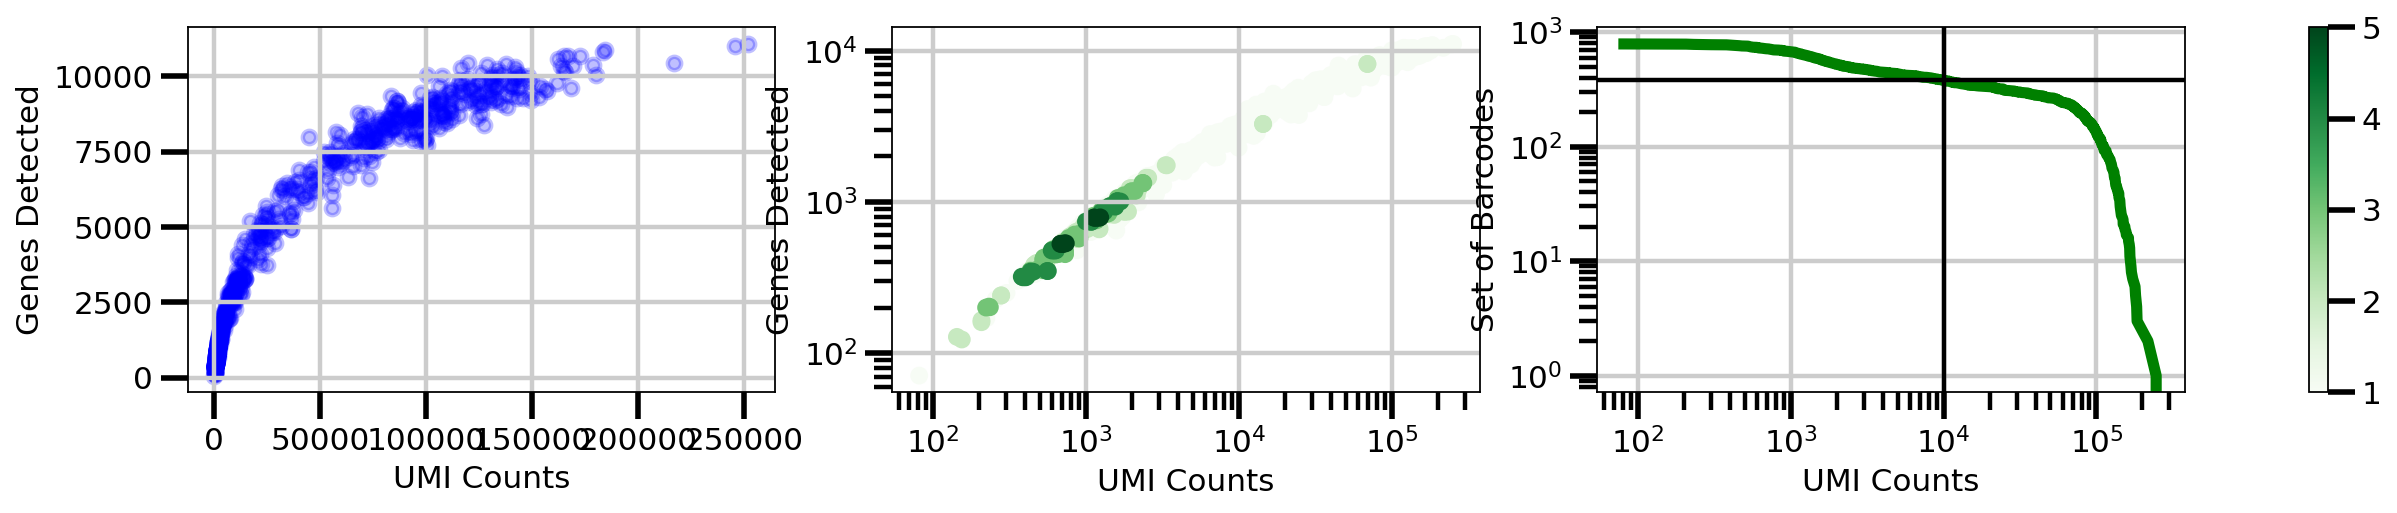

In [72]:
plot_counts(sample1,"Sample 1")

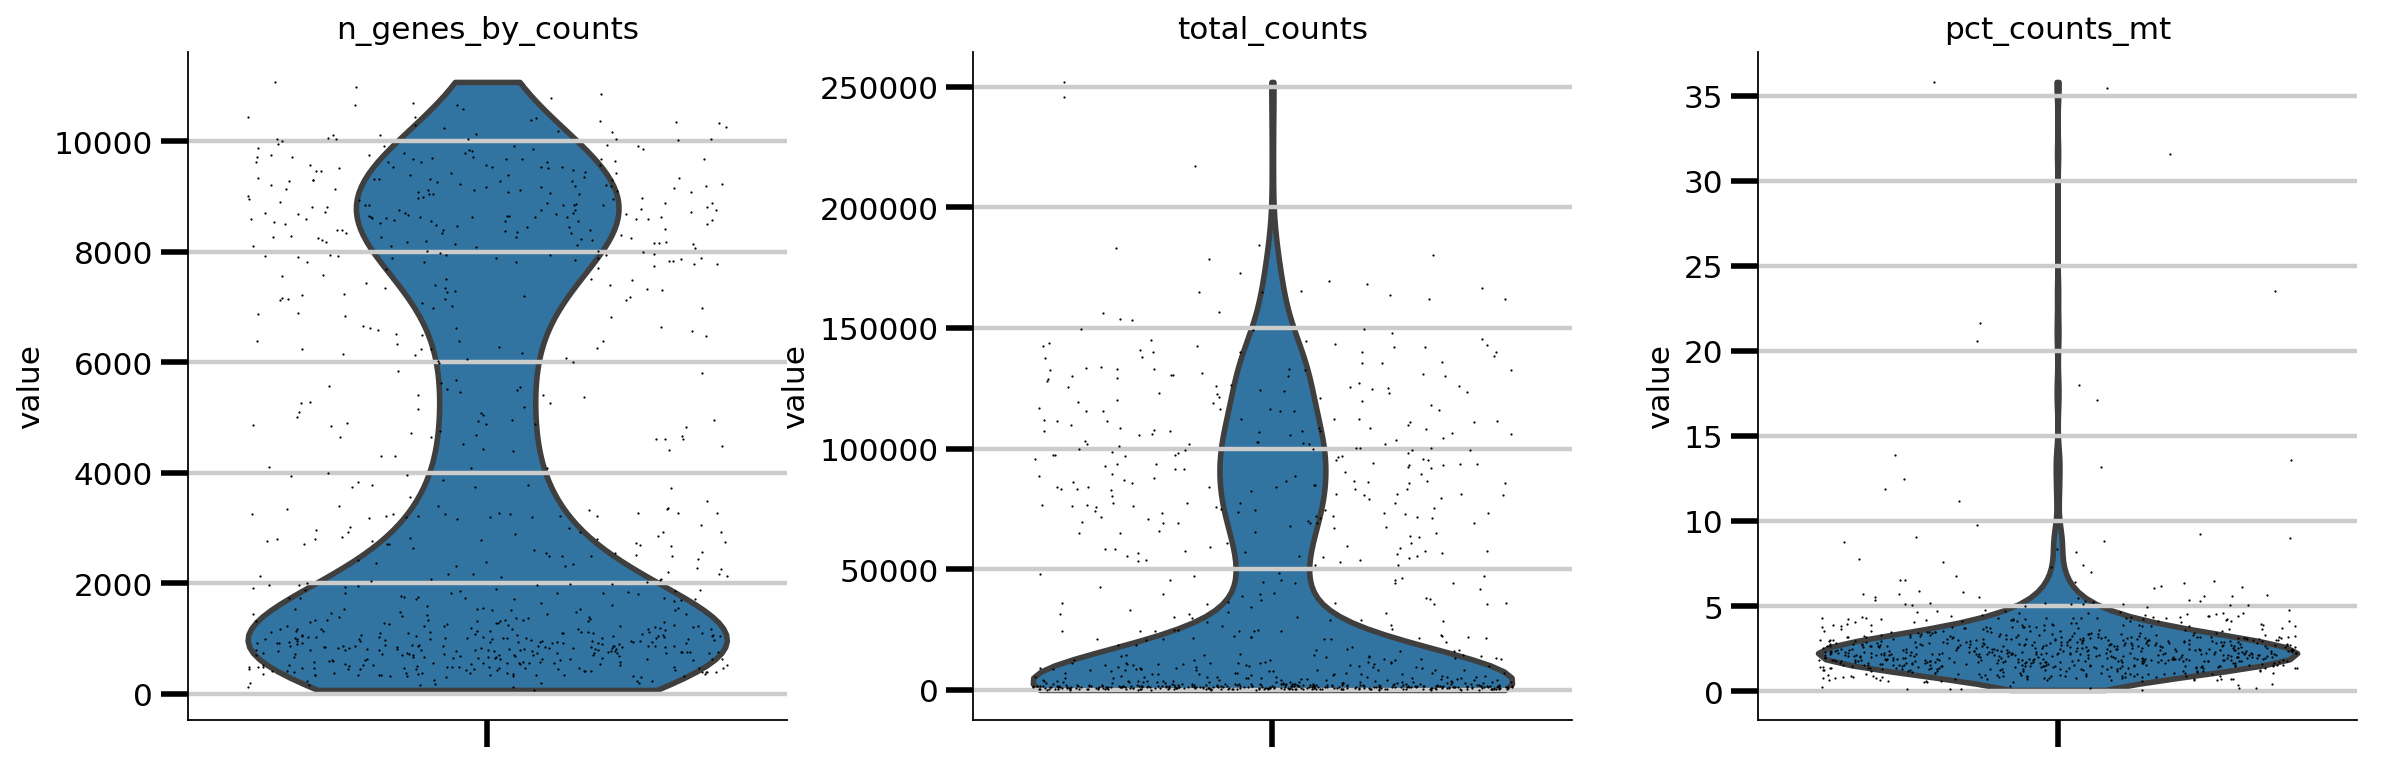

In [73]:
sc.pl.violin(sample1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

## Sample 2

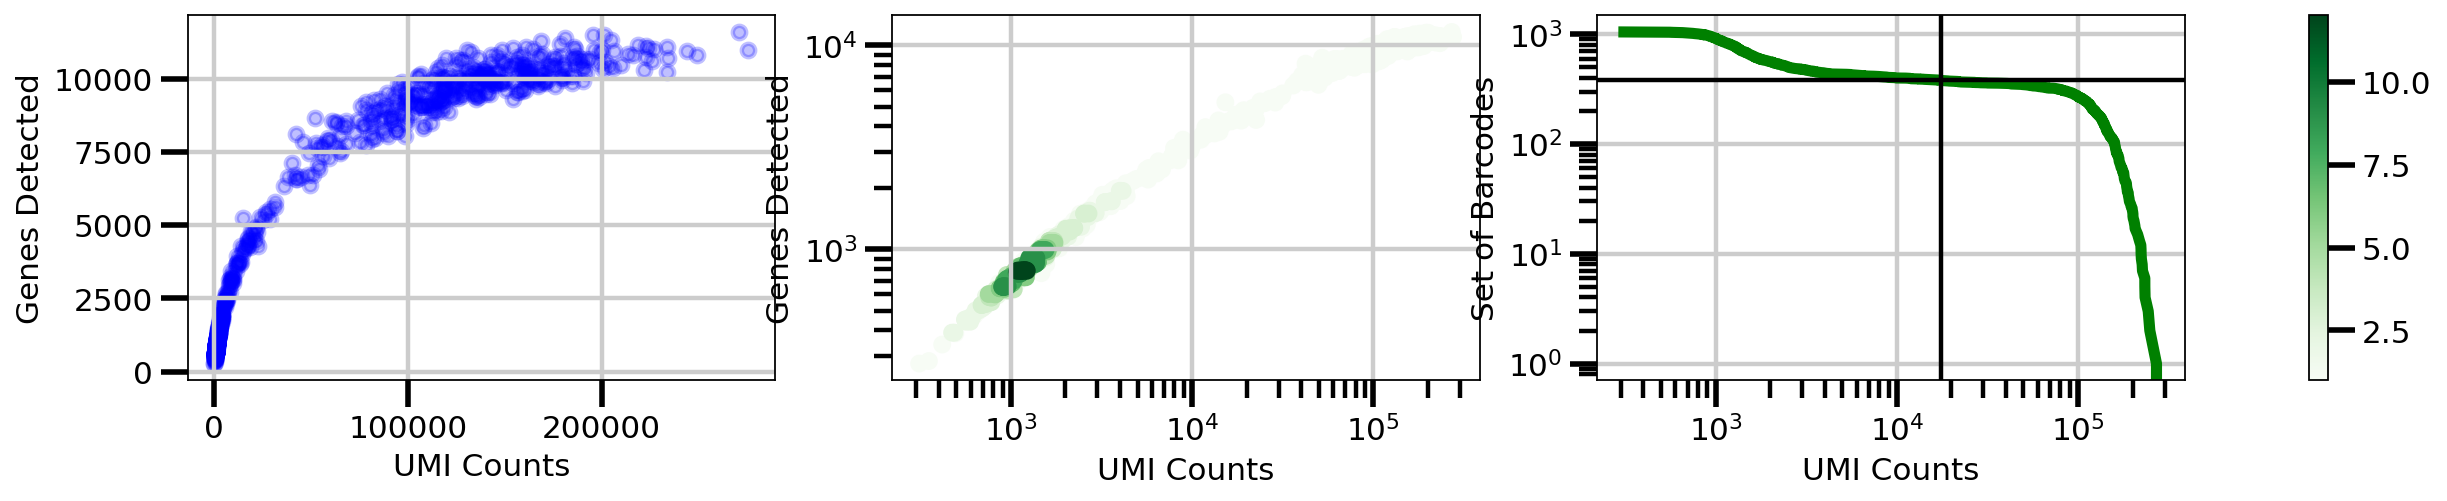

In [74]:
plot_counts(sample2,"Sample 2")

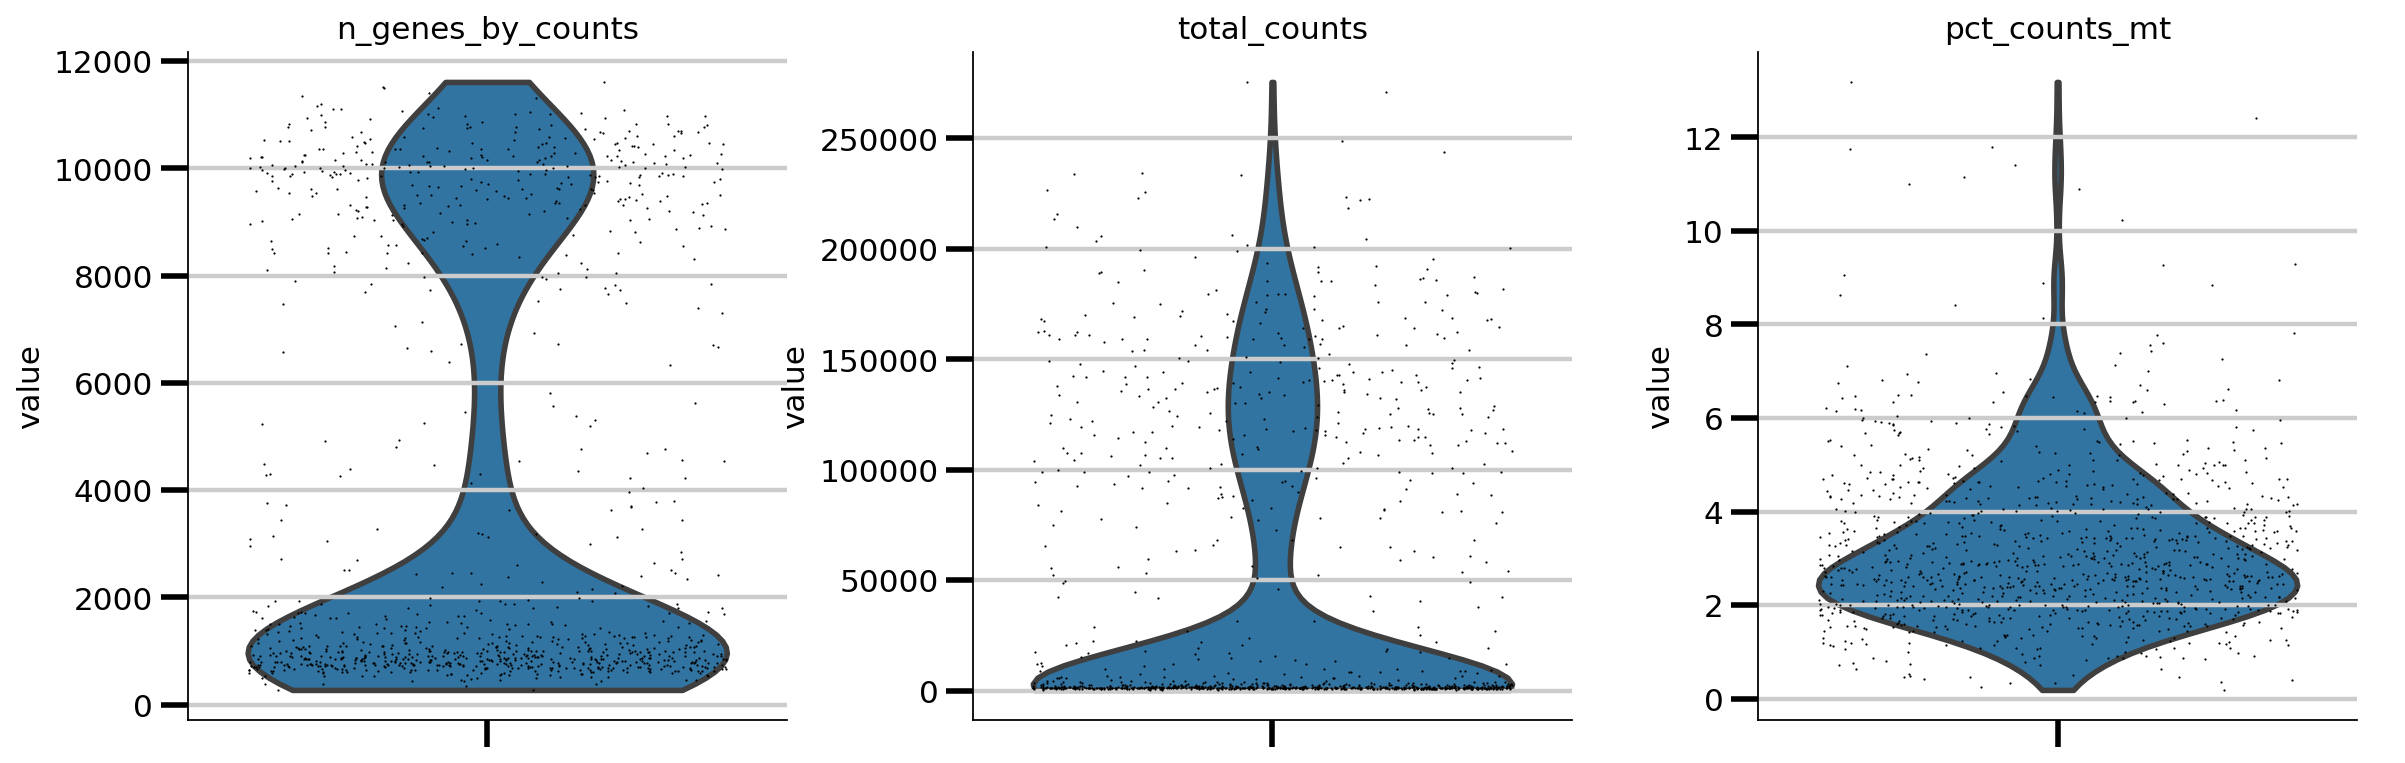

In [75]:
sc.pl.violin(sample2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

## Sample 3

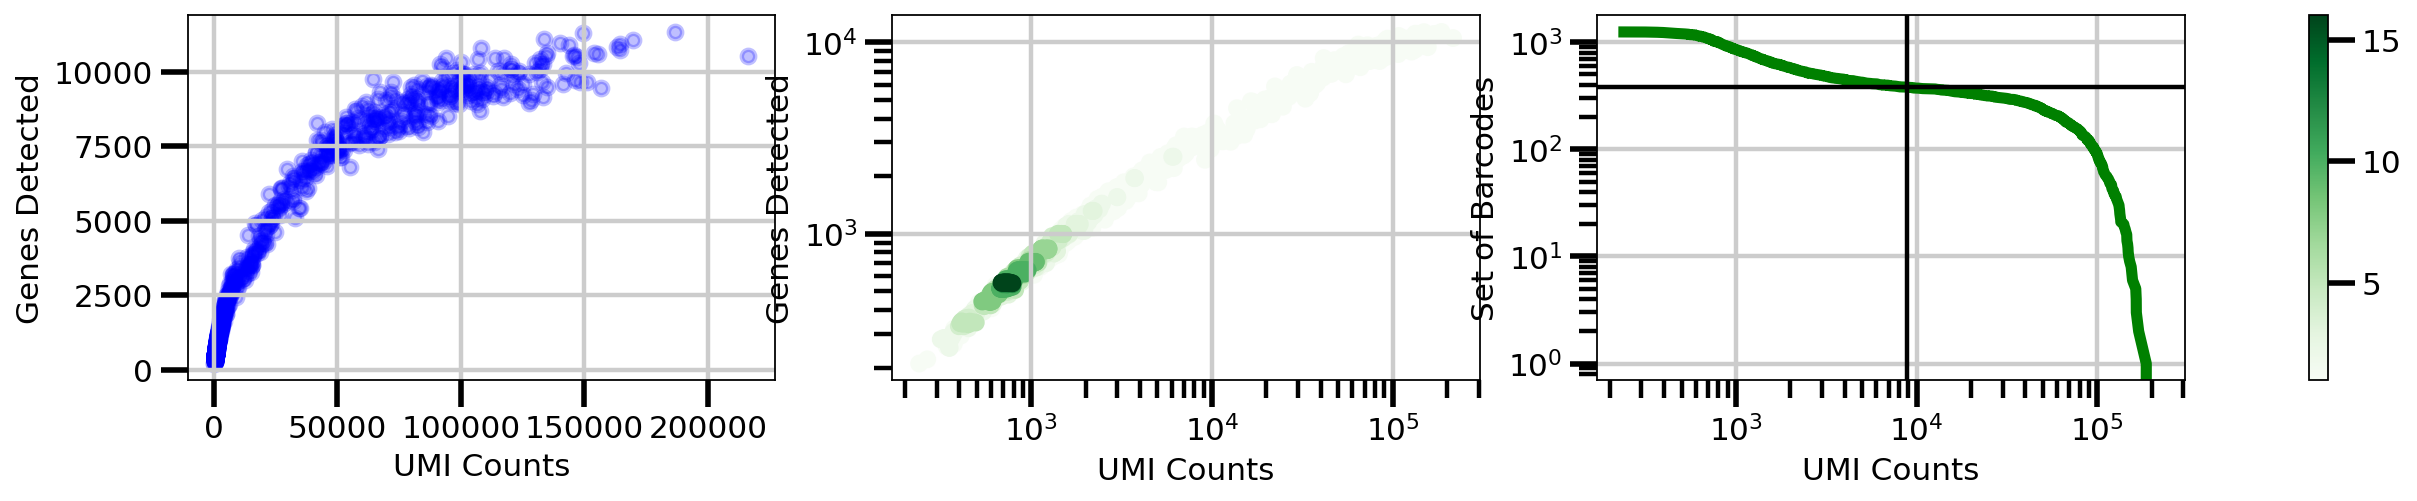

In [76]:
plot_counts(sample3,"Sample 3")

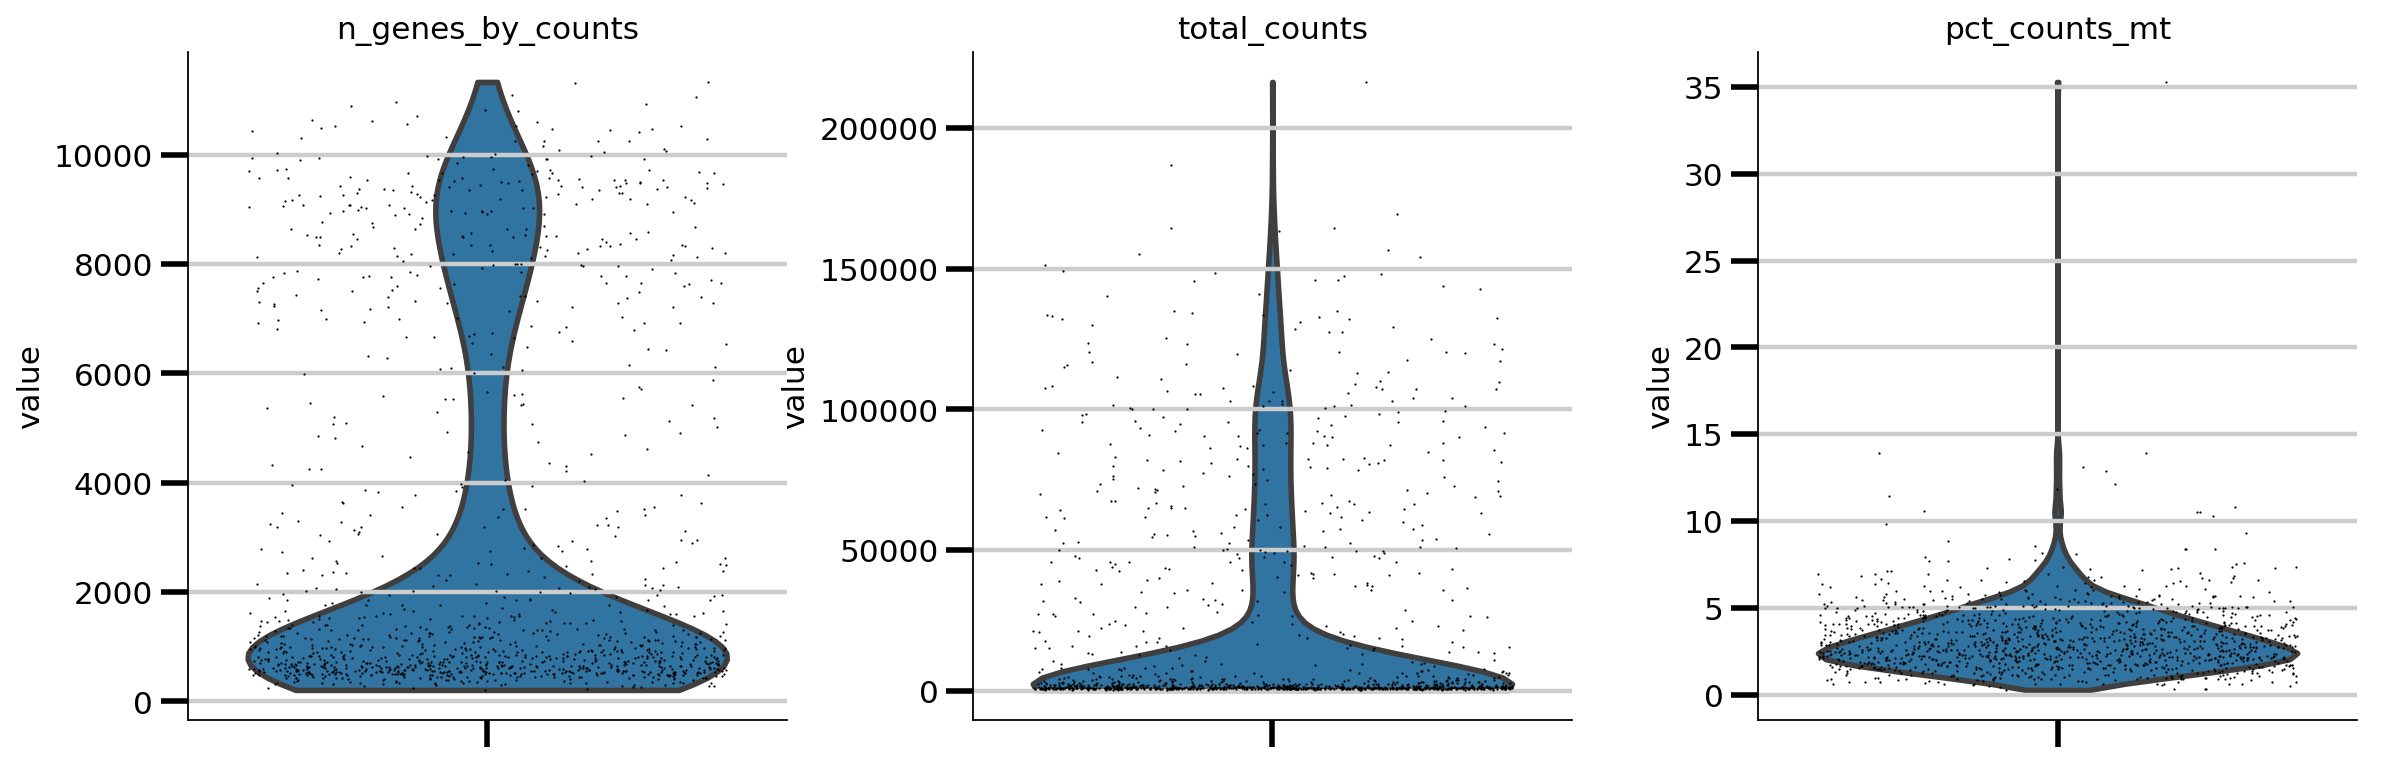

In [77]:
sc.pl.violin(sample3, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

## Sample 4

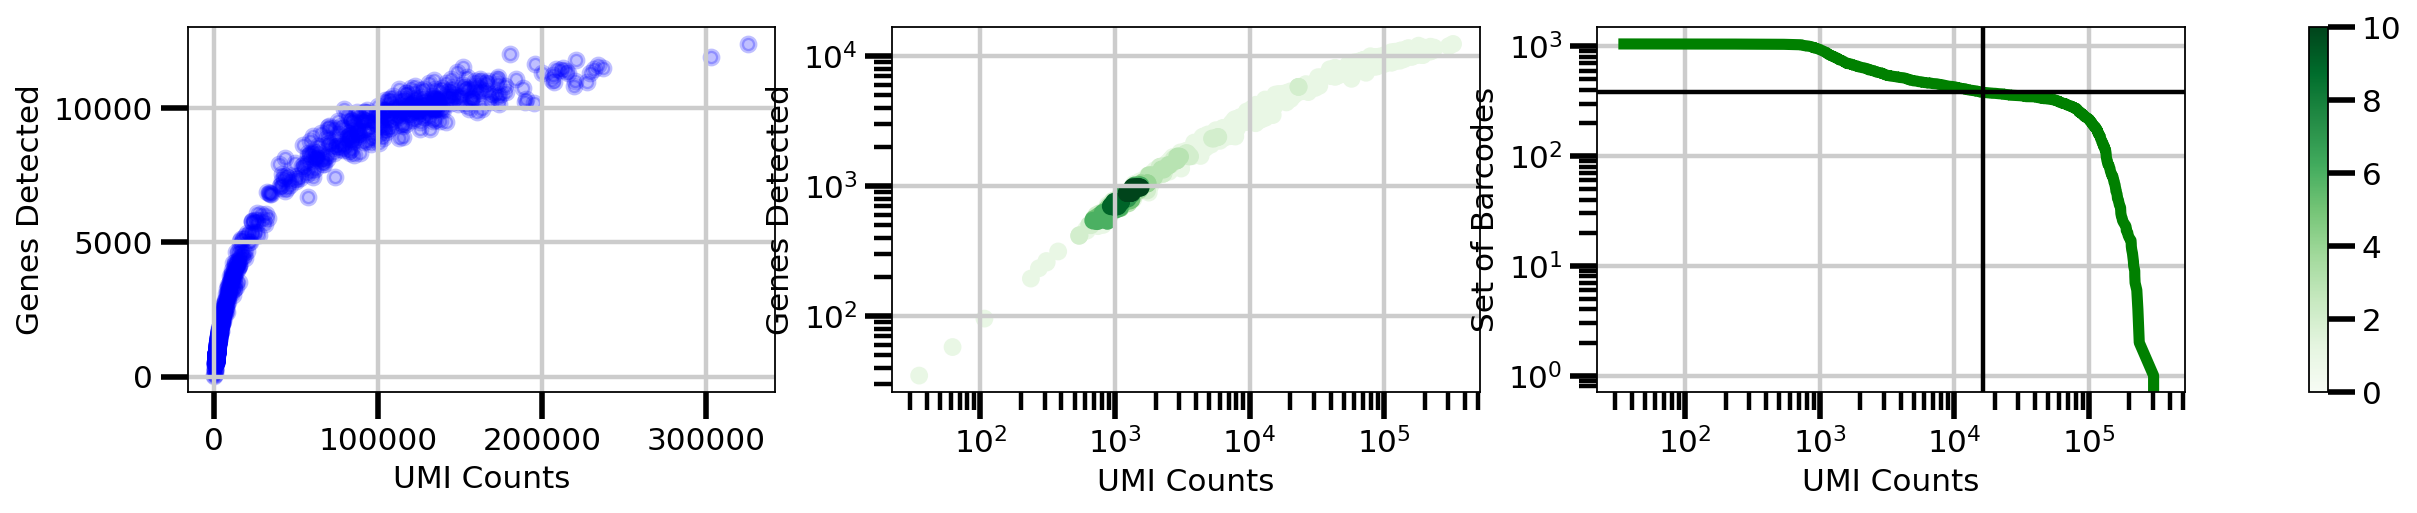

In [78]:
plot_counts(sample4,"Sample 4")

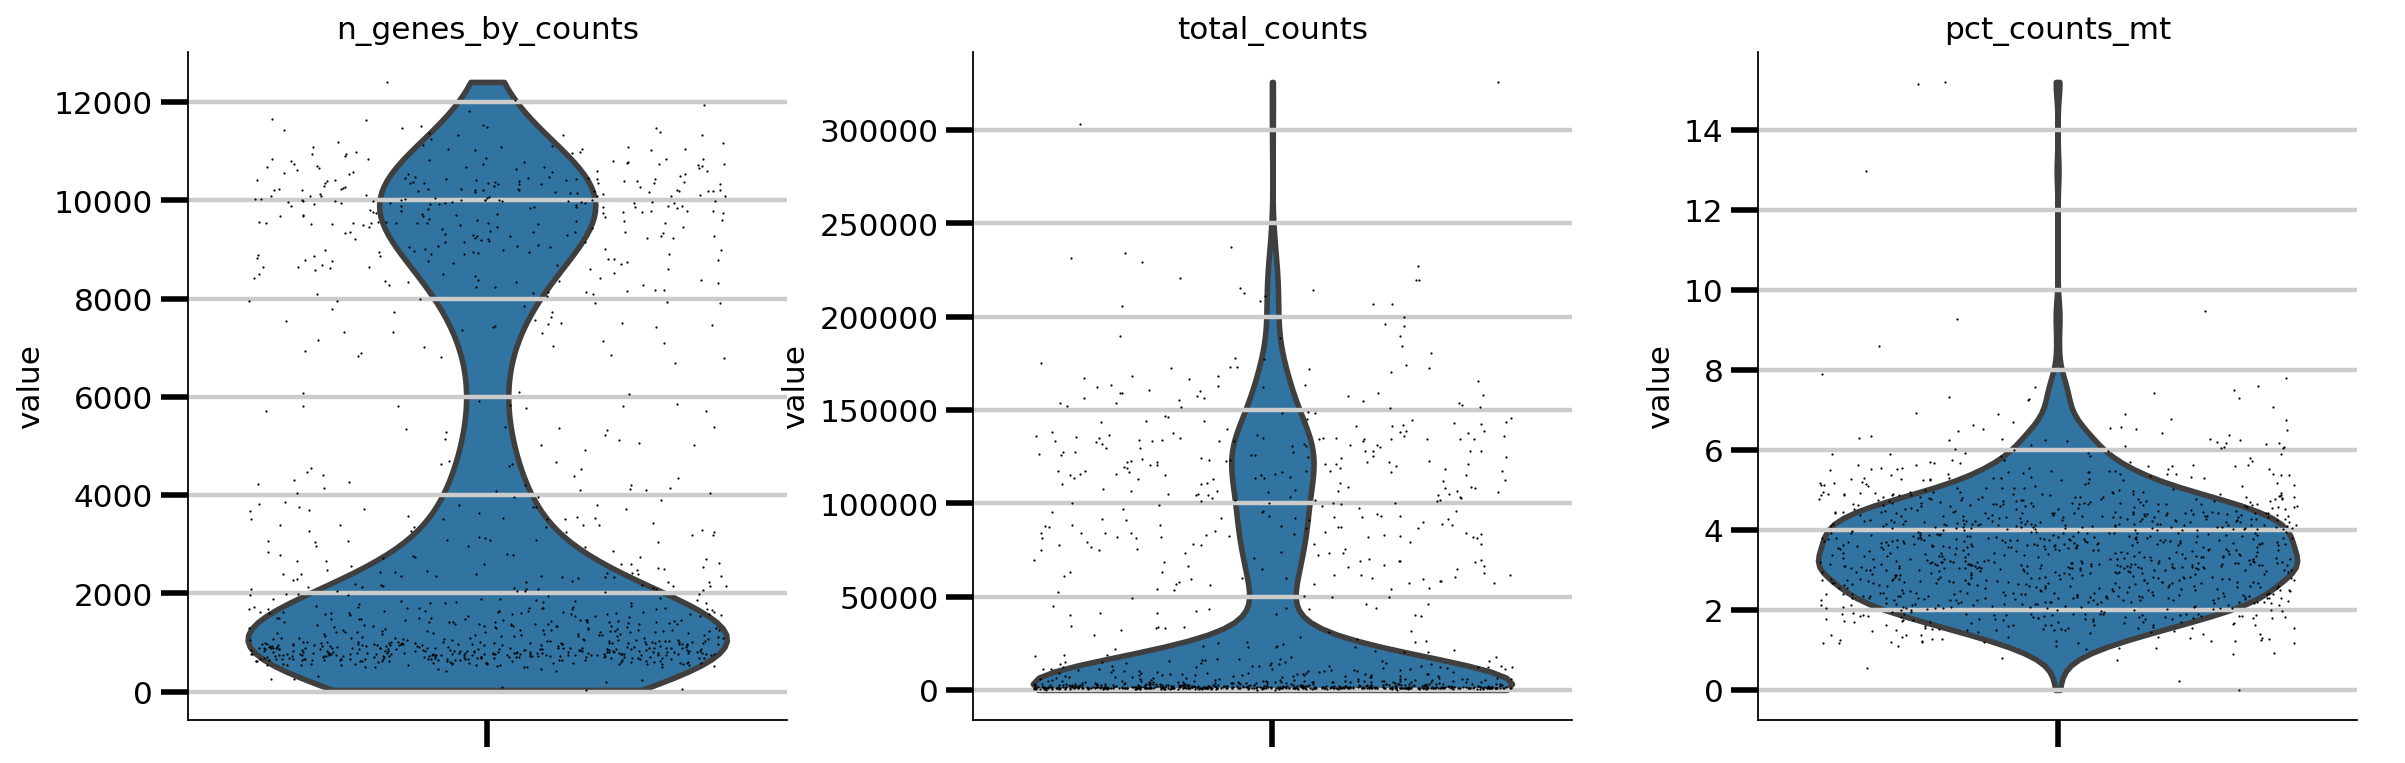

In [79]:
sc.pl.violin(sample4, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

## Sample 5

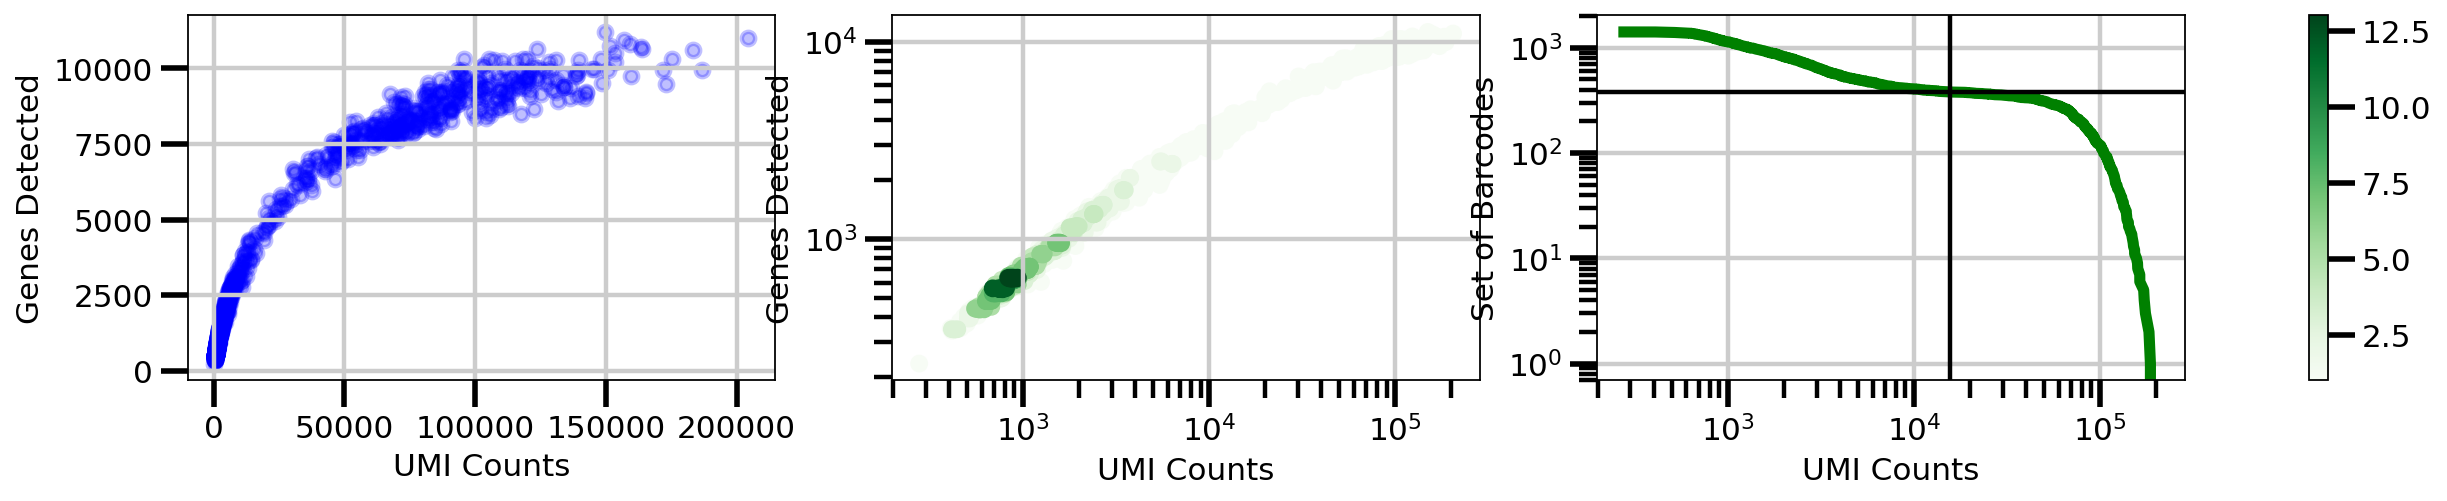

In [80]:
plot_counts(sample5,"Sample 5")

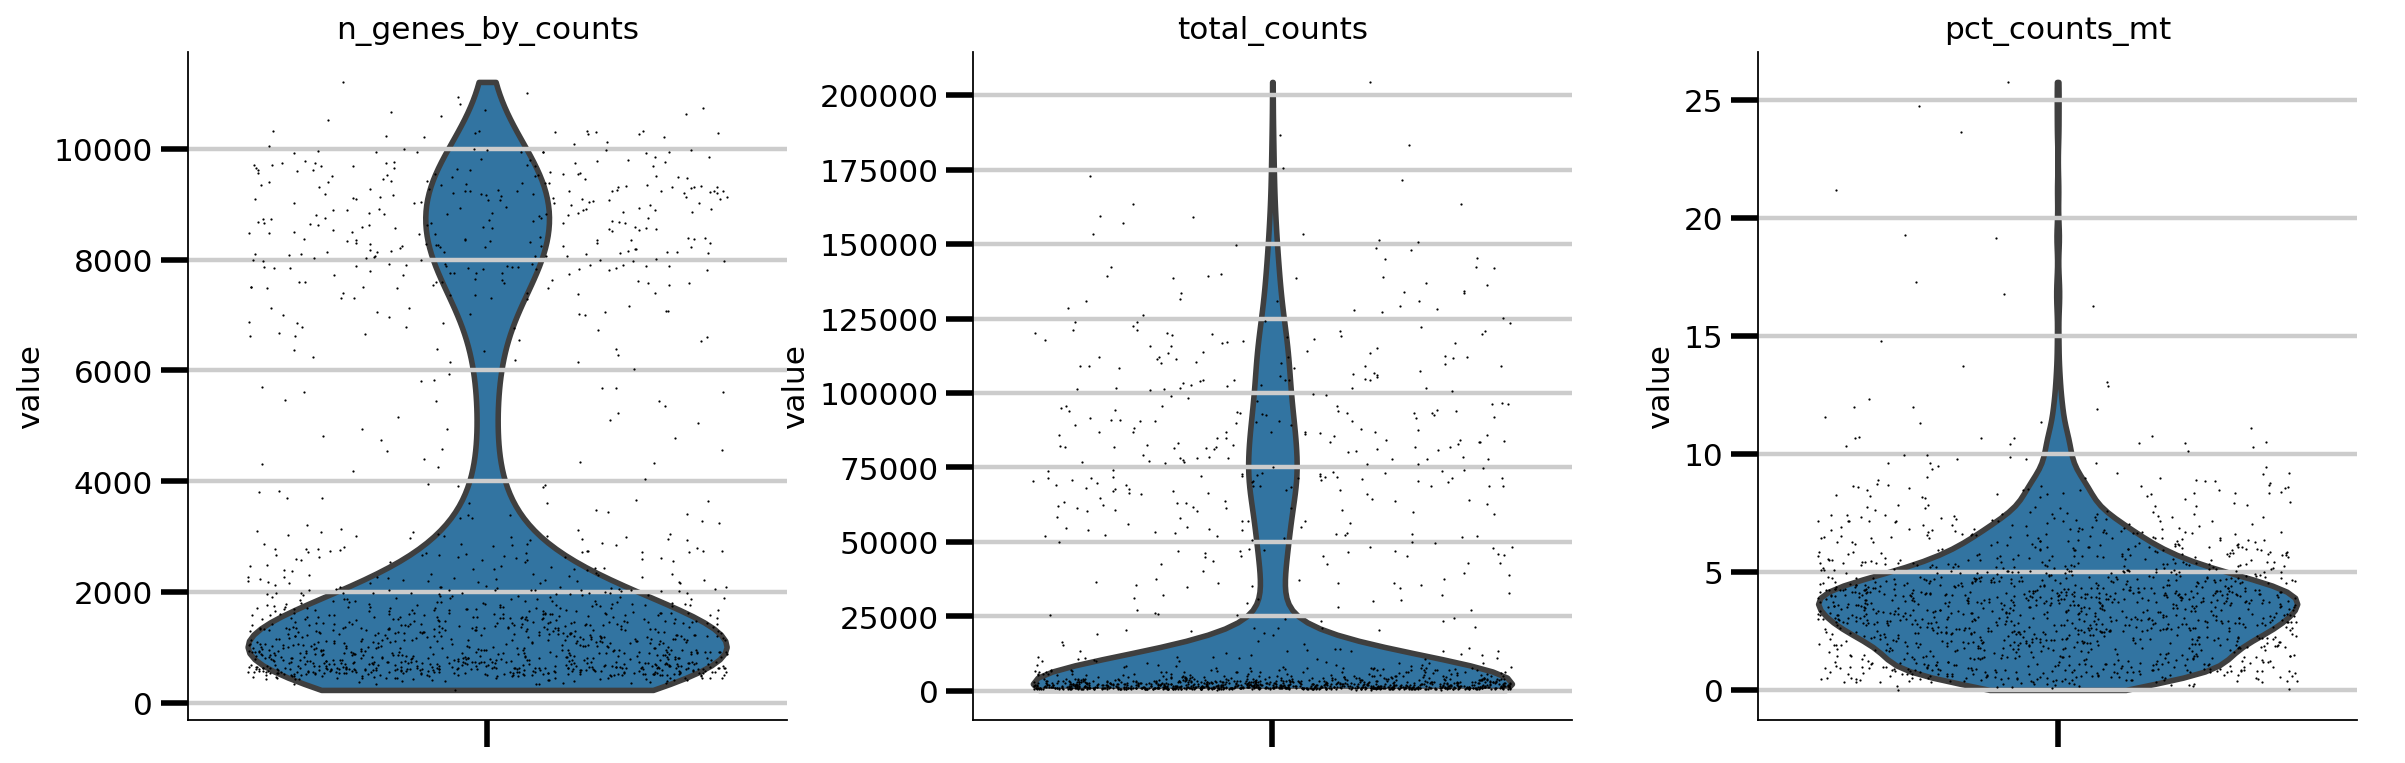

In [81]:
sc.pl.violin(sample5, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

## Sample 6

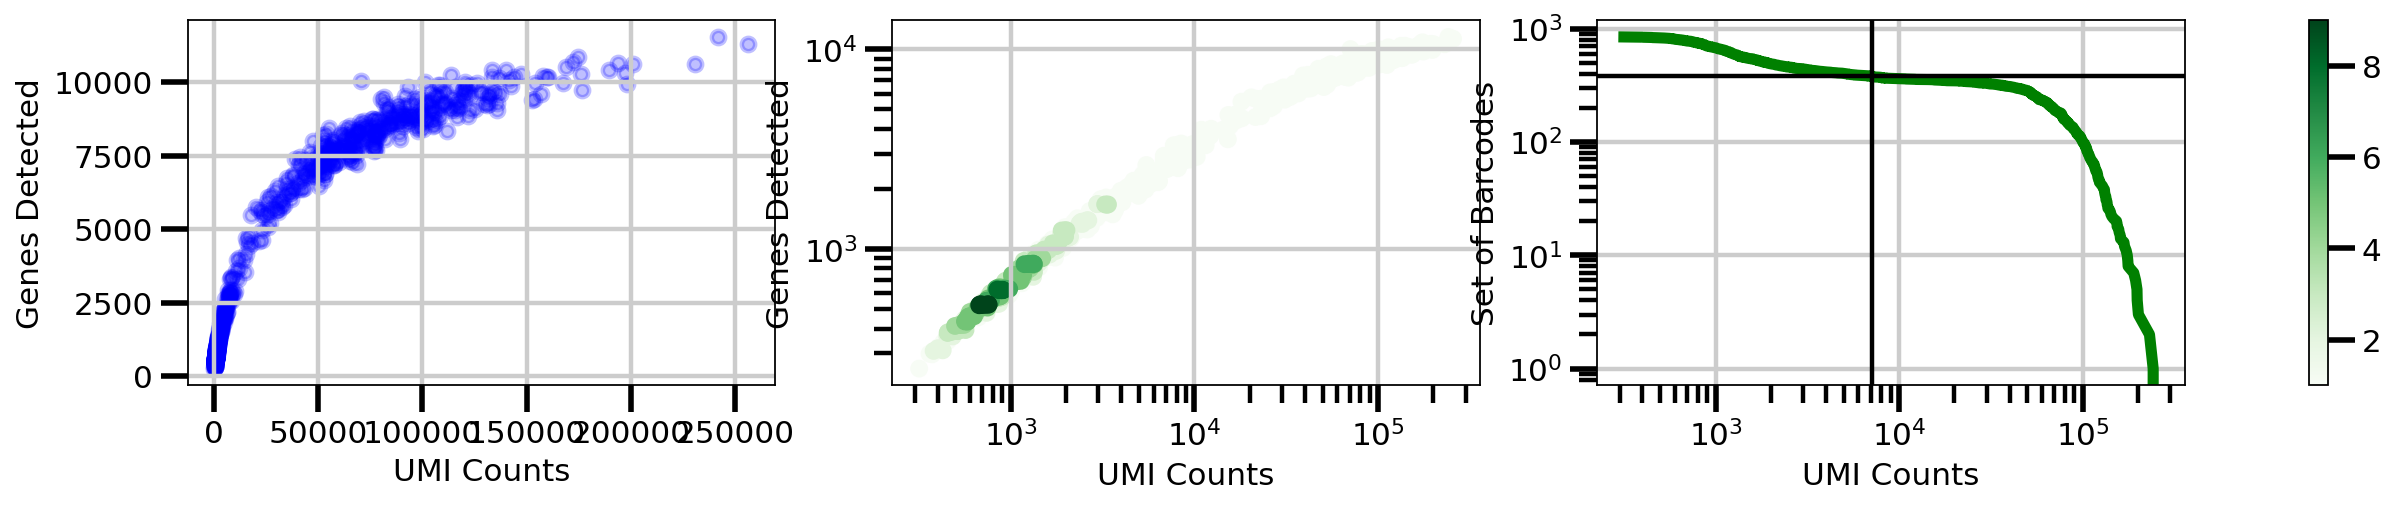

In [82]:
plot_counts(sample6,"Sample 6")

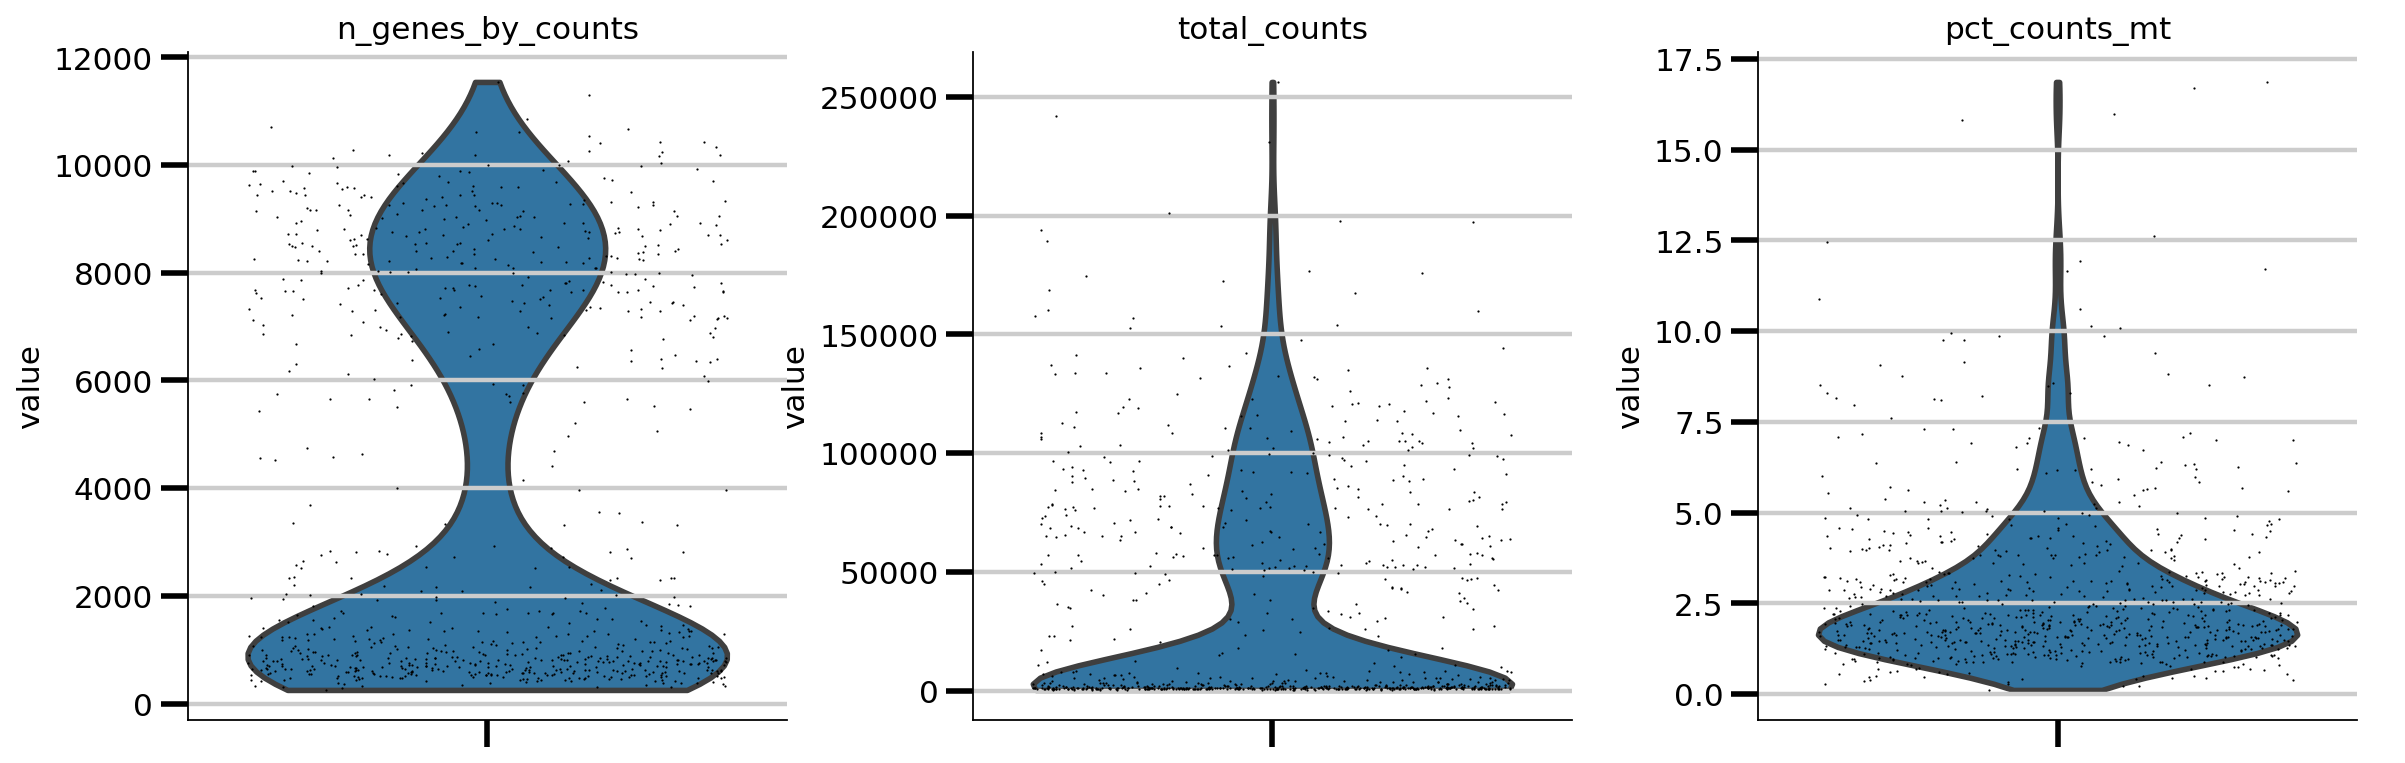

In [83]:
sc.pl.violin(sample6, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

## Sample 7

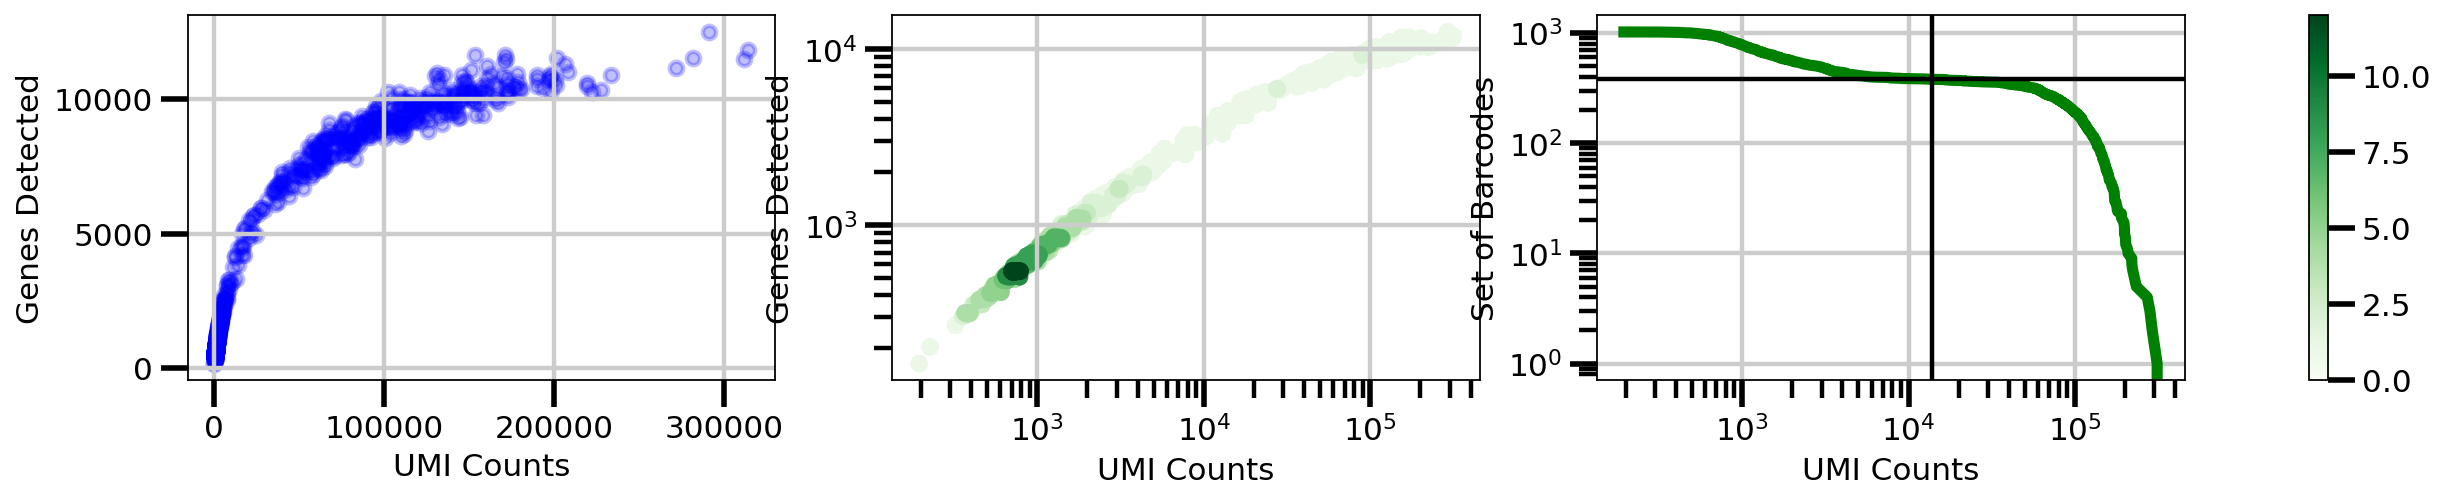

In [84]:
plot_counts(sample7,"Sample 7")

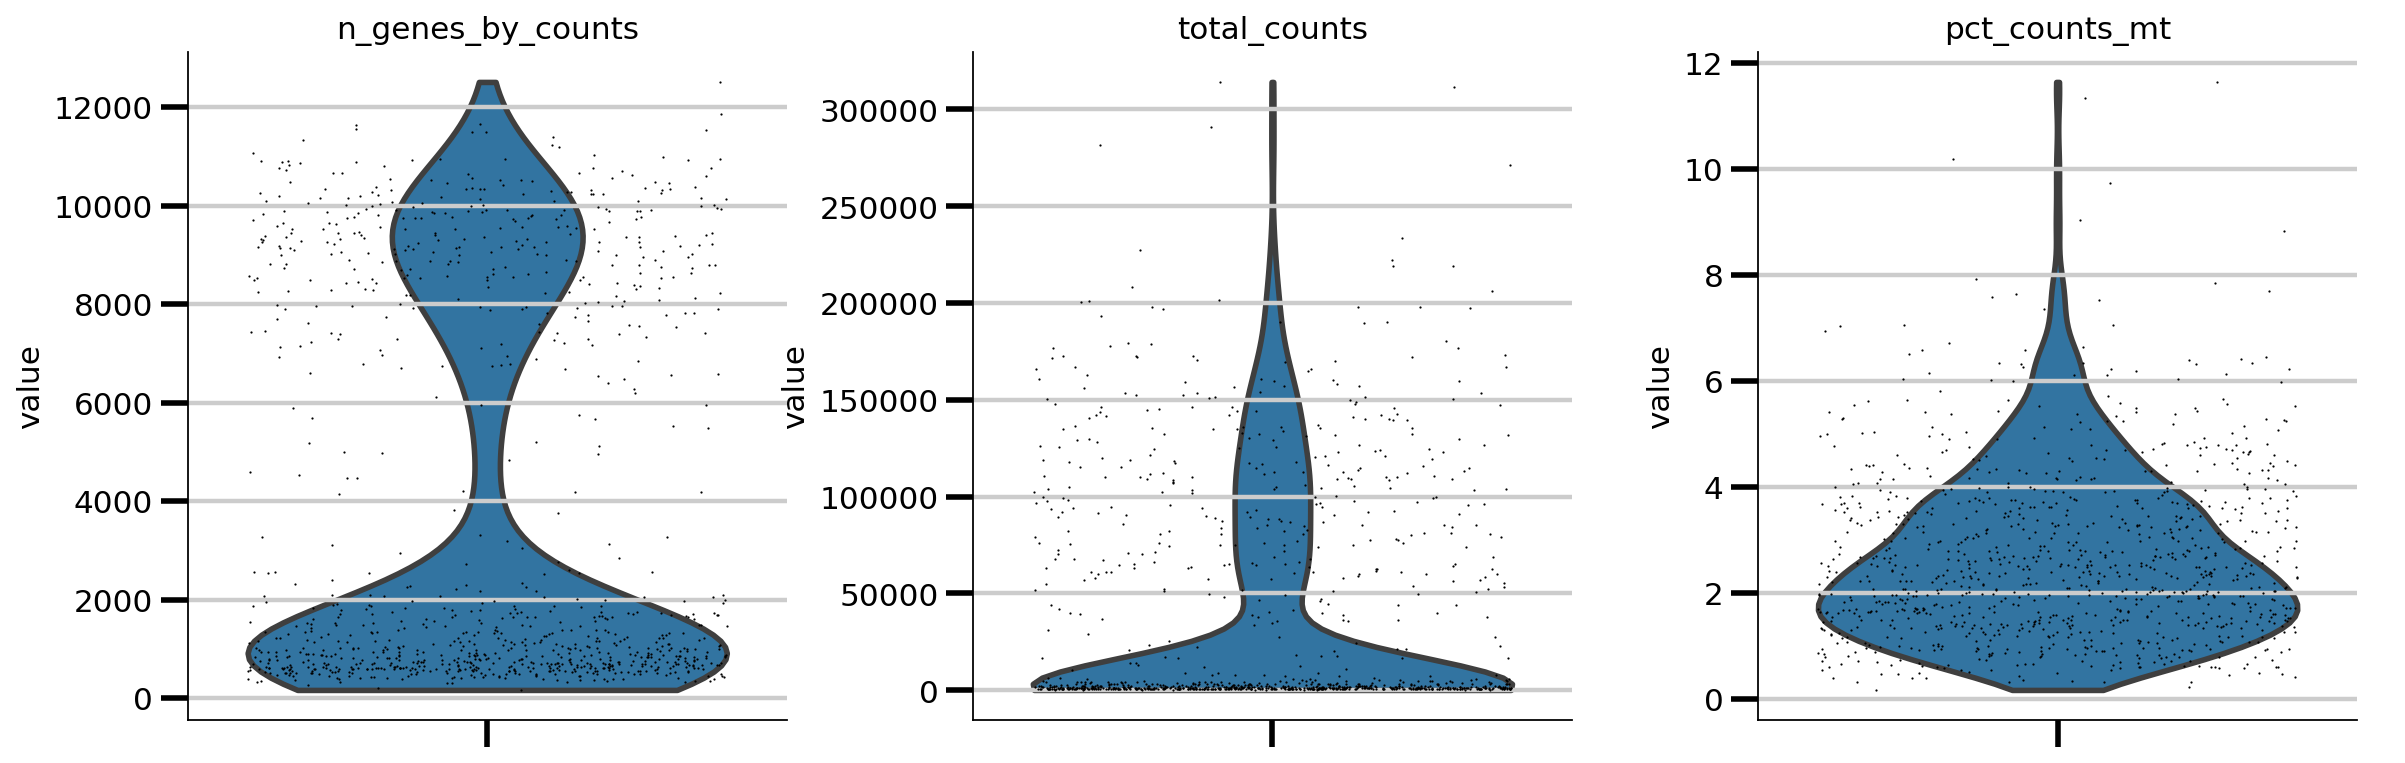

In [85]:
sc.pl.violin(sample7, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)